,Name,Linear Search Time (ms),Binary Search Time (ms),Hash Search Time (ms)
0,vaybytsmdw,2.0296,0.0079,0.0007
1,fmqfscchba,4.2759,0.0055,0.0003
2,bjlujgnknj,7.7686,0.0020,0.0005
3,lykvrxginr,11.8877,0.0082,0.0011
4,iixwtcsuur,15.2611,0.0097,0.0013
5,noekowgfgv,15.8894,0.0092,0.0016


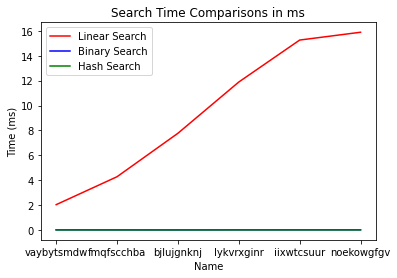

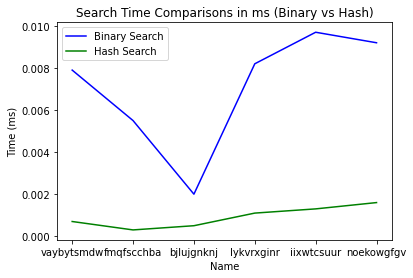

In [64]:
import numpy as np
import pandas as pd
import time
import timeit
import matplotlib.pyplot as plt
from random import choice
import string

def quicksort(array):
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    return quicksort(less) + [pivot] + quicksort(greater)

def linear_search(mylist, item):
    i = 0
    while i < len(mylist):
        if mylist[i] == item:
            return i
        else:
            i = i + 1
        
    return None


def binary_search(list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1  #high = 4


    # While you haven't narrowed it down to one element ...
    while low <= high:
      # ... check the middle element
      mid = (low + high) // 2  #mid = 2
      guess = list[mid]
      # Found the item.
      if guess == item:
        return mid
    # The guess was too high.
      if guess > item:
        high = mid - 1  #high = 1
      # The guess was too low.
      else:
        low = mid + 1

    # Item doesn't exist
    return None

chars = string.ascii_lowercase

#Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij, any order is fine, 
#just make sure there are no duplicates names) and store those names in an unsorted list.
list_unsort = [''.join(choice(chars) for _ in range(10)) for _ in range(100000)]

# create a set from the list
x_set = set(list_unsort)

# make a copy of the list
list_copy = list_unsort

# sort the copy and get the sorting time
qsort_start_time = time.perf_counter()
list_sort = quicksort(list_copy)
qsort_end_time = time.perf_counter()
qsort_time_calc = qsort_end_time - qsort_start_time
qsort_time_calc = qsort_time_calc * 1000    

# get name from unsorted array in 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions, 
#and store them in a temporary array somewhere for later use.
temp_list = []


for pos in (9999, 29999, 49999, 69999, 89999, 99999):

    nm = list_unsort[pos]
    temp_list.append(nm)
    
#print(type(temp_list))    

# Now search for these six names in each of the collections.  Use linear search for the unsorted list, 
#binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set.  
#Capture the time it takes using all three algorithms.

dataset = []

for name in (temp_list):

    #linear search on unsorted list
    linear_start_time = time.perf_counter()
    linear_search(list_unsort, name)
    linear_end_time = time.perf_counter()
    linear_time_calc = linear_end_time - linear_start_time
    linear_time_calc = linear_time_calc * 1000
    
    #binary search on sorted list
    binary_start_time = time.perf_counter()
    binary_search(list_unsort, name)
    binary_end_time = time.perf_counter()
    binary_time_calc = binary_end_time - binary_start_time
    binary_time_calc = binary_time_calc * 1000
    
    #search in the set
    set_start_time = time.perf_counter()
    if name in x_set:
        set_end_time = time.perf_counter()
        set_time_calc = set_end_time - set_start_time
        set_time_calc = set_time_calc * 1000
    else:
        pass
    
    # Append values to the dataset for use in dataframe
    dataset_row = [name, linear_time_calc, binary_time_calc, set_time_calc]
    dataset.append(dataset_row)  
    
#print(dataset)

# Create dataframe
df = pd.DataFrame(dataset)

df.columns = ["Name", "Linear Search Time (ms)", "Binary Search Time (ms)", "Hash Search Time (ms)"]

display(df)

#Create plot
ax1 = plt.gca()
df.plot(kind = 'line',y='Linear Search Time (ms)', x='Name',color='red', label = 'Linear Search', ax = ax1)
df.plot(kind = 'line',y='Binary Search Time (ms)',x='Name',color='blue', label = 'Binary Search', ax = ax1)
df.plot(kind = 'line',y='Hash Search Time (ms)',x='Name',color='green', label = 'Hash Search', ax = ax1)
plt.xlabel('Name')
plt.ylabel('Time (ms)')
plt.title('Search Time Comparisons in ms')

plt.show()

#Create plot just for Binary and Hash searches
ax1 = plt.gca()
df.plot(kind = 'line',y='Binary Search Time (ms)',x='Name',color='blue', label = 'Binary Search', ax = ax1)
df.plot(kind = 'line',y='Hash Search Time (ms)',x='Name',color='green', label = 'Hash Search', ax = ax1)
plt.xlabel('Name')
plt.ylabel('Time (ms)')
plt.title('Search Time Comparisons in ms (Binary vs Hash)')

plt.show()



In [ ]:
"""
SUMMARY

In this activity we are comparing the performances of three search algorithms: Linear Search, Binary Search, and Hash Search.
Each method was used to search for 5 particular strings within a random, unsorted list of 100000 strings.  The 5 strings were 
located at the 10000th, 30000th, 50000th, 70000th, 90000th, and 100000th positions in the list.

Linear search was used to find the 5 strings in an unsorted list.  As shown in the table and the first plot (red line), the time
it takes for the linear search to locate each string increases as the position of string gets further along the list.  Linear
search is definitely the most inefficient of the three search algorithms as it is essentially checking through the list item
by item.  Pretty much the larger the list, the more inefficient linear search is, especially for items that are located further
down the list.  Linear search may be effective when there is a small list.

Binary search was used to find the 5 strings in an already sorted list.  As shown in the table and the second plot (blue line), binary
search on a sorted list outperforms linear search by a wide margin.  This is because Binary Search searches for the string by 
repeatedly dividing each search interval in half, checking both the lower half then the upper half to determine which half the 
string would be in.  Afterwards, it will split the respective half into another half and repeat the same process until it is able
to locate the string.  This is a much more efficient method for searching through larger lists than the linear search method since it
would require less steps to find the string(s).  Interestingly enough, it appears that the Binary search performed best at locating
strings towards the middle of the list (where the blue line dips in the second plot), which fits its nature of starting its search at
a halfway-point in the list.  Binary search is effective when there is a large but sorted list.

Hash search was used to find the 5 strings in an unsorted set.  Note that a set in python is different than the lists used above 
in that it is better utilized when trying to find a specific item in it (as opposed to combing through the entire lists for an item).
Because of this, a Hash search on a set proved to be the most efficient of the search algorithms as shown in the table and the second
plot.  There was VERY little time difference between finding the different strings using a Hash search.  Hash search is effective
when there is a large unsorted list that can be converted into a set in python.



"""